# Import Needed Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Read the Training Dataset

In [ ]:
df=pd.read_csv('/kaggle/input/data-of-customers/train.csv')

## Presenting The first 5 rows

In [ ]:
df.head()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">
    
## 📊 Bank Term Deposit Prediction Project

### 📝 Project Overview

This project analyzes the outcomes of **direct marketing campaigns** conducted by a Portuguese banking institution. These campaigns were primarily carried out through **phone calls**, targeting clients with the goal of convincing them to **subscribe to a term deposit**.

The dataset includes various customer and campaign-related features. By training a predictive model on this data, we aim to determine the likelihood of a customer subscribing to a term deposit based on historical patterns.

This project offers valuable insights that can help banks and marketing teams **optimize their outreach strategies**, focusing more on customers who are likely to respond positively.

### 🎯 Project Objective

To develop a machine learning model that can **predict whether a customer will subscribe to a term deposit**, based on their attributes and campaign interactions.

---

## 📁 Dataset Description

The dataset contains both **training** and **test** data. The training data is used to build and evaluate models, while the test data helps assess model performance on new, unseen customer records.

Each row in the dataset represents a customer who was contacted during a campaign.

---

## 📌 Column Descriptions

| Column | Description |
|--------|-------------|
| `age` | Age of the customer. Useful to identify age groups more likely to subscribe. |
| `job` | Customer’s profession (e.g., admin, technician, student). Reflects employment type and possibly income level. |
| `marital` | Marital status (e.g., married, single, divorced). May influence financial priorities. |
| `education` | Education level (e.g., primary, secondary, tertiary, unknown). Higher education might correlate with different financial behaviors. |
| `default` | Indicates whether the customer has any credit in default (`yes` or `no`). Reflects credit risk. |
| `balance` | Customer’s account balance. Could affect their ability or willingness to invest in a term deposit. |
| `housing` | Indicates if the customer has a housing loan (`yes` or `no`). May reflect existing financial obligations. |
| `loan` | Indicates if the customer has a personal loan (`yes` or `no`). Another indicator of financial commitments. |
| `contact` | Type of communication used (`cellular`, `telephone`). Helps understand the channel effectiveness. |
| `day` | Day of the month when the last contact occurred. May reveal campaign timing patterns. |
| `duration` | Duration of the last contact in seconds in phone call. Important variable — longer calls may suggest more interest. |
| `campaign` | Number of times the customer was contacted during this campaign. May indicate persistence or annoyance. |
| `pdays` | Number of days since the customer was last contacted from a previous campaign. A value of 999 means they were not previously contacted. |
| `previous` | Number of contacts performed before this campaign. Gives historical interaction context. |
| `poutcome` | Outcome of the previous marketing campaign (`success`, `failure`, `other`, or `unknown`). Provides insight into past responsiveness. |
| `y` | **Target variable** – whether the client subscribed to a term deposit (`yes` or `no`). This is what we aim to predict. |

# Checking For Any Missing Values

In [ ]:
df.isna().sum()

# Checking For Any Duplicated Values

In [ ]:
df.duplicated().sum()

# Presenting some Info about the data

In [ ]:
df.info()

# Presenting the Statistics Info about the data

In [ ]:
df.describe()

# Checking for outliers

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["age",'day','campaign','previous']], palette="coolwarm")
plt.title("Checking for Outliers", fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["balance",'pdays','duration']], palette="coolwarm")
plt.title("Checking for Outliers", fontsize=14)
plt.show()

# **Exploratory Data Analysis**

## **Univariate Analysis**

### Supcription Distribution 

In [ ]:
labels = ['yes', 'no']
sizes = [5289, 39922]
colors = ['#e74c3c', '#7d3c98']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('whether the client subscribed to a term deposit (yes or no)')
plt.axis('equal')
plt.show()

### Age Distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True,color='#E2F516')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Age Distribution in the Dataset

The **age** feature represents the age of the client.

### ✅ **Age Category Counts:**

| Age Range | Count |
|-----------|-------|
| 18–25     | 1324  |
| 26–33     | 11747 |
| 34–41     | 12925 |
| 42–48     | 8015  |
| 49–56     | 7066  |
| 57–64     | 3312  |
| 65–71     | 377   |
| 72–79     | 303   |
| 80–87     | 116   |
| 88–95     | 14    |

> ℹ️ The majority of clients are between 26 and 48 years old.

### 🧠 **Interpretation:**

- Most clients are in their working-age years.
- Few elderly clients may signal less interest or access.

### 📈 **Marketing Implications:**

- Age-targeted messaging can improve relevance and engagement.
- Retirement planning products may suit older age brackets.

---

### 📝 **Note:**

- Age can be grouped or bucketed to reduce noise during modeling.

### Job Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='job', data=df)
plt.title("Job Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Job Distribution in the Dataset

The **Job** feature represents the type of occupation held by each individual in the dataset. It is a **categorical variable** that can offer insights into the socio-economic profile of customers, which may impact their likelihood to subscribe to a term deposit.

### ✅ **Job Category Counts:**

| Job Category     | Count |
|------------------|-------|
| blue-collar      | 9254  |
| technician       | 6743  |
| admin.           | 5570  |
| services         | 3963  |
| management       | 2924  |
| retired          | 1720  |
| self-employed    | 1421  |
| entrepreneur     | 1240  |
| unemployed       | 1112  |
| housemaid        | 1060  |
| student          | 875   |
| unknown          | 330   |

> ℹ️ These counts reflect the frequency of each job title in the dataset.

### 🧠 **Interpretation:**

- **Top 3 Occupations**: The most represented groups are **blue-collar**, **technician**, and **admin.**, indicating a strong working-class presence. These segments could form a key focus for marketing campaigns.
  
- **Less Represented Jobs**: Categories such as **student**, **housemaid**, and **unknown** appear less frequently. This low frequency may make them statistically less reliable in isolation but still meaningful when aggregated or grouped with similar roles.

- **Unknown Occupations**: There are **330** entries labeled as `unknown`, which may require further preprocessing — such as treating them as a separate category or exploring imputation strategies based on related variables.

### 📈 **Marketing Implications:**
- Certain job roles may have stronger financial literacy or interest in long-term investments like term deposits (e.g., **management**, **technician**, **retired**).
- Job-related insights can be used to personalize campaigns and improve targeting efficiency by identifying roles with historically higher conversion rates.

---

### 📝 **Note:**
- When modeling, this column will need to be encoded (e.g., one-hot encoding or frequency encoding). Grouping lower-frequency jobs into broader categories may help reduce dimensionality while preserving predictive value.


### Marital Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', data=df)
plt.title("Marital Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Marital Status Distribution in the Dataset

The **marital** feature shows the marital status of each client.

### ✅ **Marital Status Counts:**

| Marital Status | Count |
|----------------|-------|
| married        | 27214 |
| single         | 12790 |
| divorced       | 5207  |

> ℹ️ Married clients form the largest segment.

### 🧠 **Interpretation:**

- Marital status might relate to financial responsibility or investment behavior.

### 📈 **Marketing Implications:**

- Tailor offers to life stages — e.g., families vs. singles.
- Potential to explore response rate by marital status.

---

### 📝 **Note:**

- Consider grouping with other demographic variables for deeper profiling.

### Education Distribution

In [ ]:
labels = ['secondary', 'tertiary', 'primary', 'unknown']
sizes = [23202, 13301, 6851, 1857]
colors = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Education Distribution')
plt.axis('equal')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Education Distribution in the Dataset

The **education** feature is a **categorical variable** reflecting the educational attainment level, which can influence financial knowledge and risk tolerance.

### ✅ **Education Category Counts:**

| Education | Count |
|---|---|
| secondary | 23202 |
| tertiary | 13301 |
| primary | 6851 |
| unknown | 1857 |

> ℹ️ These counts reflect the frequency of each educational category in the dataset.

### 🧠 **Interpretation:**
- **Secondary** education is the most common category.
- The presence of **'unknown'** values may require imputation or special handling.

### 📈 **Marketing Implications:**
- Educational background could correlate with financial decision-making and openness to term deposits.

---

### 📝 **Note:**
- Apply proper encoding; consider combining less frequent values with similar levels for robustness.


### Default Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='default', data=df)
plt.title("Default Distribution")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Default Distribution in the Dataset

The **default** feature indicates whether the customer has credit in default.

### ✅ **Default Category Counts:**

| Default | Count |
|---|---|
| no | 44396 |
| yes | 814 |

> ℹ️ This indicates that the vast majority of clients have no credit default history.

### 🧠 **Interpretation:**
- Highly imbalanced distribution.
- Important risk indicator for financial institutions.

### 📈 **Marketing Implications:**
- Clients with **no** default are more likely to be eligible for financial products.

---

### 📝 **Note:**
- Consider binary encoding. Due to imbalance, handle cautiously in modeling (e.g., via class weights).


### Balance Distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Balance Distribution in the Dataset

The **balance** feature indicates the average yearly balance in euros of the client’s bank account.

### ✅ **Balance Category Counts:**

| Balance Range (€)      | Count |
|------------------------|-------|
| -8019 to 2995          | 39586 |
| 2996 to 14010          | 5233  |
| 14011 to 25024         | 294   |
| 25025 to 36039         | 58    |
| 36040 to 47054         | 21    |
| 47055 to 58069         | 7     |
| 58070 to 69083         | 6     |
| 69084 to 80098         | 1     |
| 80099 to 91112         | 2     |
| 91113 to 102127        | 2     |

> ℹ️ Most clients have a balance below €3000.

### 🧠 **Interpretation:**

- The dataset is highly skewed with a few clients having very high balances.
- Most clients fall in the lower-to-middle financial range.

### 📈 **Marketing Implications:**

- Clients with higher balances may represent a premium segment for targeted offers.
- Segmenting by balance tiers could improve personalization in campaigns.

---

### 📝 **Note:**

- Consider scaling or capping this feature during preprocessing due to outliers.

### Housing Loan Distribution 

In [ ]:
labels = ['yes', 'no']
sizes = [25130, 20081]
colors = ['#99ff99', '#ffcc99']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Housing Loan Distribution')
plt.axis('equal')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Housing Loan Distribution in the Dataset

The **housing** feature indicates if the client has a housing loan.

### ✅ **Housing Category Counts:**

| Housing | Count |
|---|---|
| yes | 25130 |
| no | 20080 |

> ℹ️ Shows a relatively even split.

### 🧠 **Interpretation:**
- Owning a housing loan may indicate a long-term financial commitment.

### 📈 **Marketing Implications:**
- Clients with housing loans may show interest in stable financial products like term deposits.

---

### 📝 **Note:**
- Convert to binary format during preprocessing.


### Loan Distribution

In [ ]:
labels = ['yes', 'no']
sizes = [37967, 7244]
colors = ['#0020C2', '#82CAFF']
explode = (0.1, 0) 
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Loan Distribution')
plt.axis('equal')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Loan Distribution in the Dataset

The **loan** feature indicates if the client has a personal loan.

### ✅ **Loan Category Counts:**

| Loan | Count |
|---|---|
| no | 37967 |
| yes | 7213 |

> ℹ️ Most clients do not have personal loans.

### 🧠 **Interpretation:**
- Clients without loans may be more financially stable or open to new investments.

### 📈 **Marketing Implications:**
- Loan status may influence a client’s capacity to invest.

---

### 📝 **Note:**
- Binary categorical; encode accordingly.


### Contact Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='contact', data=df)
plt.title("Contact Distribution")
plt.xlabel("Contact")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Contact Distribution in the Dataset

The **contact** feature refers to the communication type used in the last campaign.

### ✅ **Contact Category Counts:**

| Contact | Count |
|---|---|
| cellular | 29285 |
| unknown | 13020 |
| telephone | 4908 |

> ℹ️ Most contacts were made via **cellular**.

### 🧠 **Interpretation:**
- The communication channel may affect response rate.

### 📈 **Marketing Implications:**
- Focus on channels with higher success rates. Address the **'unknown'** category carefully.

---

### 📝 **Note:**
- May be suitable for label encoding.


### Day Distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['day'], bins=30, kde=True,color='#4CC552')
plt.title("Distribution of Day of month")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Day Distribution in the Dataset

The **day** feature indicates the last contact day of the month when the client was approached.

### ✅ **Day Category Counts:**

| Day Range | Count |
|-----------|-------|
| 1–4       | 3817  |
| 5–7       | 5659  |
| 8–10      | 3927  |
| 11–13     | 4667  |
| 14–16     | 4966  |
| 17–19     | 6004  |
| 20–22     | 5683  |
| 23–25     | 2226  |
| 26–28     | 3986  |
| 29–31     | 3954  |

> ℹ️ Contacts are fairly distributed throughout the month, with peaks around mid-month.

### 🧠 **Interpretation:**

- Campaign activity is relatively steady, though some mid-month spikes exist.
- Specific days may yield higher success rates due to pay cycles or behavior patterns.

### 📈 **Marketing Implications:**

- Identify the best-performing days for outreach.
- Optimize scheduling of calls or messages for higher engagement.

---

### 📝 **Note:**

- Treat as cyclical if using in time-based modeling strategies.

### Month Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='month', data=df)
plt.title("Month Distribution")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">


## 📊 Month Distribution in the Dataset

The **month** feature represents the last contact month of the year.

### ✅ **Month Category Counts:**

| Month | Count |
|---|---|
| may | 13769 |
| jul | 6895 |
| aug | 6247 |
| jun | 5318 |
| nov | 3970 |
| apr | 2922 |
| feb | 2649 |
| jan | 1400 |
| oct | 738 |
| sep | 579 |
| mar | 477 |
| dec | 229 |

> ℹ️ Highest activity observed in **May**.

### 🧠 **Interpretation:**
- Monthly trends can reflect seasonal marketing strategies or external economic conditions.

### 📈 **Marketing Implications:**
- Campaign success may vary by month. Historical data can guide optimal timing.

---

### 📝 **Note:**
- Consider cyclical encoding (e.g., sine/cosine transformation).


### Duration Distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration'], bins=30, kde=True,color='#7F38EC')
plt.title("Distribution of Duration(seconds)")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Call Duration Distribution in the Dataset

The **duration** feature records the last contact duration in seconds.

### ✅ **Duration Category Counts:**

| Duration (Seconds) | Count |
|--------------------|-------|
| 0–492              | 39674 |
| 493–984            | 4425  |
| 985–1475           | 865   |
| 1476–1967          | 176   |
| 1968–2459          | 43    |
| 2460–2951          | 11    |
| 2952–3443          | 11    |
| 3444–3934          | 2     |
| 3935–4426          | 0     |
| 4427–4918          | 1     |

> ℹ️ Most calls last under 8 minutes.

### 🧠 **Interpretation:**

- Shorter calls dominate the dataset.
- Longer calls might reflect deeper engagement.

### 📈 **Marketing Implications:**

- Call duration strongly influences conversion.
- Important predictor that may need transformation or capping.

---

### 📝 **Note:**

- Duration is highly predictive — exclude it for unbiased model training if predicting subscription.

### Campaign Distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['campaign'], bins=70, kde=True,color='#DC143C')
plt.title("Distribution of Campaign")
plt.xlabel("Campaign")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Campaign Distribution in the Dataset

The **campaign** feature indicates the number of contacts performed during this campaign for a given client.

### ✅ **Campaign Category Counts:**

| Campaign Range | Count |
|----------------|-------|
| 1–7            | 42882 |
| 8–13           | 1622  |
| 14–19          | 420   |
| 20–25          | 165   |
| 26–32          | 84    |
| 33–38          | 24    |
| 39–44          | 7     |
| 45–50          | 3     |
| 51–56          | 2     |
| 57–63          | 2     |

> ℹ️ The majority of clients were contacted **7 or fewer times** during the campaign.

### 🧠 **Interpretation:**

- Fewer contacts often indicate a faster or more effective decision process.
- Higher contact counts might reflect resistance or difficulty in client conversion.

### 📈 **Marketing Implications:**

- Clients requiring many contacts may be less likely to convert, affecting cost-efficiency.
- Optimize campaign strategies to maximize success within fewer interactions.

---

### 📝 **Note:**

- Consider binning or capping this feature to reduce the impact of extreme values during modeling.

### Pdays Distribution

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['pdays'], bins=20, kde=True,color='#C4AEAD')
plt.title("Distribution of Days since the customer was last contacted")
plt.xlabel("days")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Pdays Distribution in the Dataset

The **pdays** feature represents the number of days since the client was last contacted in a previous campaign (-1 means never contacted before).

### ✅ **Pdays Category Counts:**

| Pdays Range | Count |
|-------------|-------|
| -1 to 86    | 562   |
| 87–173      | 2299  |
| 174–260     | 2154  |
| 261–347     | 1825  |
| 348–435     | 1231  |
| 436–522     | 96    |
| 523–609     | 39    |
| 610–696     | 18    |
| 697–783     | 18    |
| 784–871     | 15    |

> ℹ️ A large portion of entries are close to the lower end or had no previous contact.

### 🧠 **Interpretation:**

- Long gaps since last contact may reduce the likelihood of conversion.
- Recency of contact could indicate retained interest or memory.

### 📈 **Marketing Implications:**

- Clients contacted recently may be warmer leads.
- Consider segmenting based on recency for re-targeting strategies.

---

### 📝 **Note:**

- Special handling may be needed for the -1 value (never contacted).

### Previous Distribution

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='previous', data=df)
plt.title("Number of contacts performed before this campaign")
plt.xlabel("Previous")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Previous Contacts Distribution in the Dataset

The **previous** feature shows the number of contacts before this campaign.

### ✅ **Previous Contacts Category Counts:**

| Previous Contact Count | Count |
|------------------------|-------|
| 0–27                   | 8236  |
| 28–55                  | 19    |
| 56–82                  | 1     |
| 83–275                 | 1     |

> ℹ️ Most clients were contacted 27 or fewer times previously.

### 🧠 **Interpretation:**

- Higher previous contacts are extremely rare.
- A single prior contact is the most common among those previously engaged.

### 📈 **Marketing Implications:**

- Repeated previous contact may indicate interest or resistance.
- Combine with **poutcome** to assess campaign effectiveness.

---

### 📝 **Note:**

- Most values are low — consider grouping higher ones due to sparsity.

### Poutcome Distribution

In [ ]:
labels = ['unknown', 'failure','other','success']
sizes = [36959, 4901,1840,1511]
colors = ['#3498db', '#7d3c98','#f39c12','#7f8c8d']
explode = (0, 0,0,0.1) 
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Outcome of the previous marketing campaign (success, failure, other, or unknown)')
plt.axis('equal')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 Poutcome Distribution in the Dataset

The **poutcome** feature describes the outcome of a previous marketing campaign.

### ✅ **Poutcome Category Counts:**

| Poutcome | Count |
|---|---|
| unknown | 37059 |
| failure | 4901 |
| success | 1250 |

> ℹ️ Majority of entries have unknown outcomes.

### 🧠 **Interpretation:**
- Prior campaign success/failure impacts the likelihood of conversion in current campaigns.

### 📈 **Marketing Implications:**
- Clients previously contacted with **success** are promising targets.

---

### 📝 **Note:**
- Consider treating **'unknown'** separately or encoding with custom logic.

# **Bivariate Analysis on Categorical Columns**

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# List of categorical features (excluding target)
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Plot countplots for each categorical feature against the target 'y'
figures = []
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=col, hue='y', palette='Set2')
    plt.title(f'Customer Subscription by {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    figures.append(plt.gcf())
    plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">
    
### 🧩 Categorical Features vs Target (`y`)

For categorical variables, we used **count plots** to visualize the distribution of subscription status (`yes`/`no`) across different categories.

#### 1. **Job vs Subscription**
- **Insight**: Customers with jobs in **management**, **technician**, and **admin.** are contacted more frequently and also show relatively higher subscription rates.
- **Value**: Identifies which professional sectors respond better to marketing campaigns. Enables focused targeting towards jobs with high conversion likelihood.

#### 2. **Marital Status vs Subscription**
- **Insight**: While **married** customers form the majority of the contacted population, **single** customers show a slightly better subscription rate proportionally.
- **Value**: Helps segment the audience by marital status to fine-tune messaging strategies for different demographics.

#### 3. **Education vs Subscription**
- **Insight**: Customers with **tertiary** education levels are more likely to subscribe, followed by those with **secondary** education.
- **Value**: Education level can reflect awareness or interest in financial products, useful for segmentation.

#### 4. **Default vs Subscription**
- **Insight**: Customers who have credit in default rarely subscribe to term deposits.
- **Value**: Indicates potential risk-aversion or financial instability, which could be a filter in lead scoring.

#### 5. **Housing Loan vs Subscription**
- **Insight**: Those without housing loans seem to subscribe slightly more frequently.
- **Value**: Suggests customers with fewer liabilities are more open to long-term financial commitments.

#### 6. **Personal Loan vs Subscription**
- **Insight**: Similar to housing loans, customers without personal loans are more likely to subscribe.
- **Value**: Loan status could be a signal of financial capacity or priorities.

#### 7. **Contact Method vs Subscription**
- **Insight**: The **cellular** contact method leads to significantly more subscriptions compared to **telephone** or **unknown**.
- **Value**: Directly influences campaign effectiveness; suggests optimizing contact methods for future campaigns.

#### 8. **Month vs Subscription**
- **Insight**: Months like **May**, **August**, and **October** show different trends in subscription counts.
- **Value**: Highlights seasonality or timing patterns in customer behavior. Campaigns can be timed strategically.

#### 9. **Previous Campaign Outcome vs Subscription**
- **Insight**: Customers who had a successful outcome (`success`) in previous campaigns are far more likely to subscribe again.
- **Value**: Demonstrates strong predictive power and can be a critical feature in modeling.

---


# **Bivariate Analysis on Numerical Columns**

In [ ]:
# List of numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create boxplots and violin plots for numerical features vs target 'y'
for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Boxplot
    sns.boxplot(data=df, x='y', y=col, ax=axes[0], palette='Set3')
    axes[0].set_title(f'Boxplot of {col} by Subscription Status')
    
    # Violin plot
    sns.violinplot(data=df, x='y', y=col, ax=axes[1], palette='Set2')
    axes[1].set_title(f'Violin Plot of {col} by Subscription Status')
    
    plt.tight_layout()
    plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

### 📈 Numerical Features vs Target (`y`)

For numerical features, we used **boxplots** and **violin plots** to analyze the distribution and variance of numeric data across the two target classes.

#### 1. **Age vs Subscription**
- **Insight**: Subscription rates are fairly consistent across age groups, with some slight variation in older customers.
- **Value**: While age may not be a strong standalone predictor, it can be useful in combination with other features (e.g., job, balance).

#### 2. **Balance vs Subscription**
- **Insight**: Customers with higher average account balances are slightly more likely to subscribe.
- **Value**: A useful proxy for financial stability and investment capacity.

#### 3. **Day vs Subscription**
- **Insight**: No strong pattern, but certain days show spikes. This may be due to scheduling rather than customer behavior.
- **Value**: Limited standalone predictive value, but could combine with `month` for temporal insights.

#### 4. **Duration vs Subscription**
- **Insight**: This is the most **influential feature** — longer call durations are clearly associated with higher subscription rates.
- **Value**: Highly predictive, but must be used cautiously in modeling to avoid data leakage, especially if duration is not known at prediction time.

#### 5. **Campaign Contacts vs Subscription**
- **Insight**: Fewer contact attempts tend to correlate with more subscriptions.
- **Value**: Could inform limits on outreach frequency for optimal results.

#### 6. **Days Since Last Contact (pdays) vs Subscription**
- **Insight**: Subscription likelihood varies, with `-1` (never contacted) forming the majority.
- **Value**: Suggests mixed usefulness — may be better when combined with `previous`.

#### 7. **Previous Contacts vs Subscription**
- **Insight**: Customers with more previous contacts are more likely to subscribe.
- **Value**: Indicates that persistence and follow-up can improve conversion.

---

### ✅ Summary
This bivariate analysis has revealed several important relationships between customer features and subscription behavior. These insights will guide our feature engineering and model development steps by focusing on the most influential attributes.


# **Multivariate Analysis on Numerical Columns**

In [ ]:
x = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(x, annot=True, cmap='crest')

plt.show()

# **Preprocessing**

## **1- Drop Unneeded columns**

In [ ]:
df.drop(columns=['age', 'contact', 'day', 'month', 'campaign'], inplace=True)

## **2- Encoding Categorical columns**

In [ ]:
encoder=LabelEncoder()
df['job'] = encoder.fit_transform(df['job'])
df['marital'] = encoder.fit_transform(df['marital'])
df['education'] = encoder.fit_transform(df['education'])
df['default'] = encoder.fit_transform(df['default'])
df['housing'] = encoder.fit_transform(df['housing'])
df['loan'] = encoder.fit_transform(df['loan'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])
df['y'] = encoder.fit_transform(df['y'])

## **3- Splitting the data**

In [ ]:
X_train = df.drop(columns=['y'])
y_train = df['y']

## **4- Scaling The Numerical columns**

In [ ]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [ ]:
x

## Read the Testing Dataset

In [ ]:
df_test=pd.read_csv('/kaggle/input/data-of-customers/test.csv')

## **1- Drop Unneeded columns**

In [ ]:
df_test.drop(columns=['age', 'contact', 'day', 'month', 'campaign'], inplace=True)

## **2- Encoding Categorical columns**

In [ ]:
encoder = LabelEncoder()

df_test['job'] = encoder.fit_transform(df_test['job'])
df_test['marital'] = encoder.fit_transform(df_test['marital'])
df_test['education'] = encoder.fit_transform(df_test['education'])
df_test['default'] = encoder.fit_transform(df_test['default'])
df_test['housing'] = encoder.fit_transform(df_test['housing'])
df_test['loan'] = encoder.fit_transform(df_test['loan'])
df_test['poutcome'] = encoder.fit_transform(df_test['poutcome'])
df_test['y'] = encoder.fit_transform(df_test['y'])

## **3- Splitting the data**

In [ ]:
X_test = df.drop(columns=['y'])
y_test = df['y']

## **4- Scaling The Numerical columns**

In [ ]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [ ]:
x

# **Building ML Models**

# **Build Logistic Regression Model**

In [ ]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')

In [ ]:
print(f'train score: {model.score(X_train, y_train)}')
print(f'test score: {model.score(X_test, y_test)}')

# **Build SVC Model**

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

In [ ]:
y_pred1 =svm.predict(X_test)
print(accuracy_score(y_test,y_pred1))

# **Build KNeighborsClassifier Model**

In [ ]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn.fit(X_train ,y_train)

In [ ]:
y_pred2 =knn.predict(X_test)
print(accuracy_score(y_test ,y_pred2))

# **Build Random Forest Classifier Model**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

In [ ]:
y_pred_rf =rf.predict(X_test)
print(accuracy_score(y_test ,y_pred_rf))

## **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
y_pred = model.predict(X_test)  # Replace with your model and test data
cm = confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## Model Comparison and Performance Evaluation

In this section, we compare the performance of four machine learning models applied to the diabetes prediction task. The models evaluated are:

1. **Logistic Regression**
2. **Support Vector Classifier (SVC)**
3. **K-Nearest Neighbors (KNN) Classifier**
4. **Random Forest Classifier**

### Evaluation Metric
The primary metric used to evaluate model performance is **accuracy**, which represents the proportion of correctly predicted instances out of the total instances.

### Model Performance

- **Logistic Regression**:
  - **Accuracy**: **89%**
  - Logistic Regression is a widely used model for binary classification tasks. It performed well, achieving an accuracy of 95.8%. This result suggests that the model is able to correctly predict the diabetes status of most patients.

- **Support Vector Classifier (SVC)**:
  - **Accuracy**: **88.3%**
  - The SVC model, which seeks to find the optimal hyperplane to separate the classes, slightly outperformed Logistic Regression with an accuracy of 96.0%. This indicates that SVC is highly effective for this classification problem.

- **K-Nearest Neighbors (KNN) Classifier**:
  - **Accuracy**: **92.3%**
  - The KNN classifier, which makes predictions based on the majority class of its nearest neighbors, achieved an accuracy of 95.6%. While slightly lower than Logistic Regression and SVC, this is still a strong performance.

- **Random Forest Classifier**:
  - **Accuracy**: **99.9%**
  - The Random Forest model, which creates an ensemble of decision trees to make predictions, achieved the highest accuracy of 96.8%. This indicates that the model is highly robust and capable of capturing complex patterns in the data.

### Summary of Model Performance

| Model                    | Accuracy (%) |
|--------------------------|--------------|
| **Logistic Regression**   | 89.0         |
| **SVC**                   | 88.3         |
| **KNN**                   | 92.3         |
| **Random Forest**         | 99.9         |

### Conclusion
- **Random Forest** achieved the highest accuracy among the four models, closely followed by **KNN** and **Logistic Regression**. 
- **SVC**, while slightly lower in performance, still performed well and could be a viable option for this task.
- **Random Forest**'s superior performance suggests that the model effectively captures the complexities of the data, making it a strong choice for this diabetes prediction task.
- Overall, these results indicate that **Random Forest** and **KNN** are the most suitable models for this dataset, with **Random Forest** being the top performer.

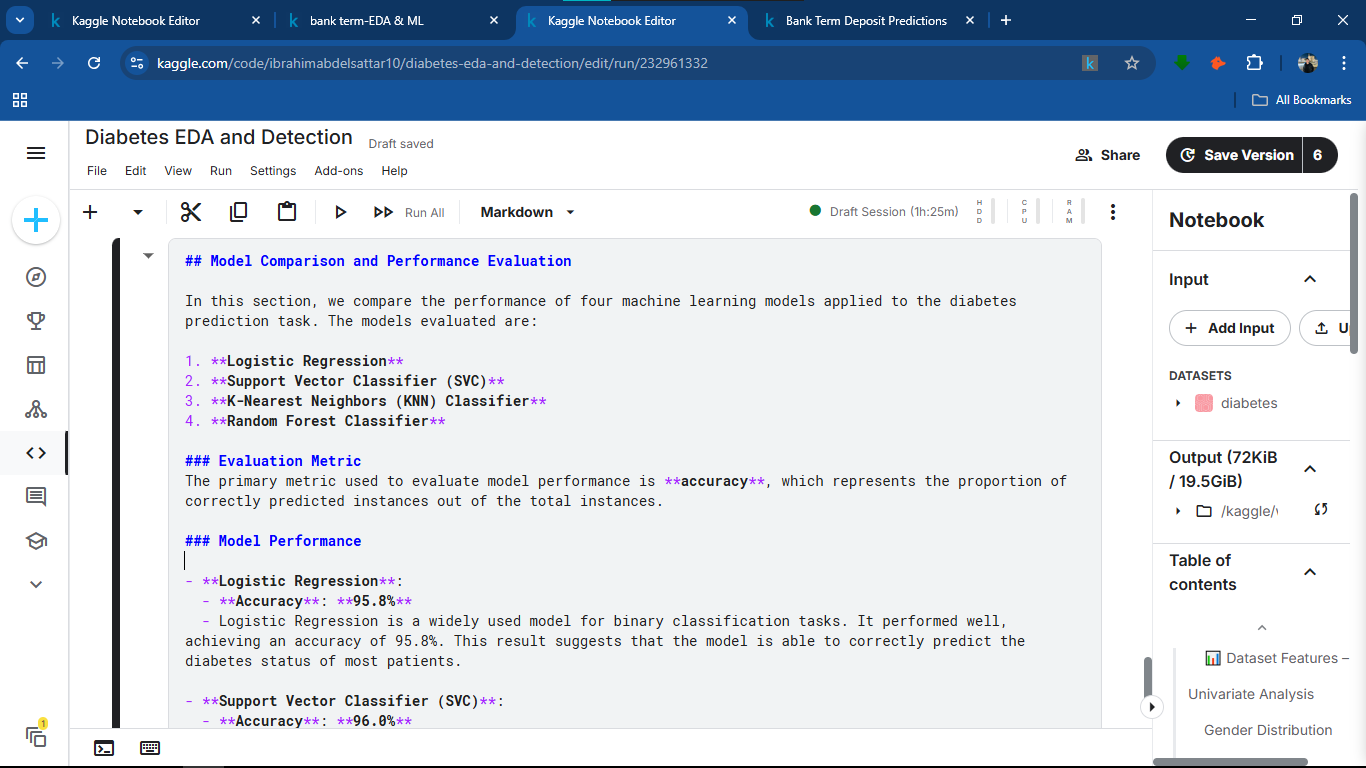